In [1]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


642

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q="
# print(query)

In [31]:

weather_dict = []

# # Loop through the list of cities and perform a request for data on each
for city in cities[0:10]:
    
    #   Get weather data
    response = requests.get(query + city).json()
    time.sleep(1)
    
    try:
        # Store weather factors
        name = (response['name'])
        id = (response['id'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        speed = (response['wind']['speed'])
        country = (response['sys']['country'])
        dt = (response['dt'])
        print(f'City Name: {city}, ID: {id}' )
        
        weather_dict.append({
        'City': name,
        'Lat' : lat,
        'Lon' : lon,
        'Temp' : temp,
        'Humidity' : humidity,
        'Cloudiness' : cloudiness,
        'Wind Speed' : speed,
        'Country' : country,
        'Date' : dt
        })
        weather_data = pd.DataFrame(weather_dict)
        
     
    except:             
        print(f"Key Error Ignore") 
        pass
    

City Name: ayni, ID: 1222222
City Name: ushuaia, ID: 3833367
City Name: albany, ID: 5106841
Key Error Ignore
City Name: castro, ID: 3466704
City Name: broken hill, ID: 2173911
City Name: paragominas, ID: 3393106
City Name: chuy, ID: 3443061
City Name: buea, ID: 2233410
City Name: kruisfontein, ID: 986717


## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [50]:
# Create a data frame from from append lists

weather_data.head()


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,Ayní,39.3941,68.5377,288.10,41,47,0.95,TJ,1633665494,North
1,Ushuaia,-54.8000,-68.3000,280.96,46,75,5.66,AR,1633665200,South
2,Albany,42.6001,-73.9662,285.73,94,28,0.87,US,1633665496,North
3,Castro,-24.7911,-50.0119,285.09,98,100,4.04,BR,1633665499,South
4,Broken Hill,-31.9500,141.4333,296.99,15,0,4.12,AU,1633665479,South


In [33]:
weather_data.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,-10.673478,-5.475511,288.314444,68.333333,49.000000,2.525556,1.633665e+09
std,34.090985,73.210217,5.881014,29.219001,39.484174,1.880160,9.952275e+01
min,-54.800000,-73.966200,280.960000,15.000000,0.000000,0.500000,1.633665e+09
25%,-33.697100,-53.461600,285.090000,46.000000,15.000000,0.950000,1.633665e+09
50%,-24.791100,-47.483300,288.090000,80.000000,47.000000,1.870000,1.633665e+09
75%,4.152700,24.731400,292.580000,93.000000,75.000000,4.040000,1.633666e+09
max,42.600100,141.433300,296.990000,98.000000,100.000000,5.660000,1.633666e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [34]:
# Get the indices of cities that have humidity over 100%.

# BY DEFINITION, 100% humidity is as high as physically possible therefore no cities
# have a higher than 100% humidity. But just to be sure:
# weather_data.sort_values('Humidity')

# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 60)]
# wet_weather

# Get rid of any data that claims more than 100 humidity
# MAY HAVE TO SAY:  If humidity is > 100 , then drop...
# clean_weather = weather_data.drop(wet_weather, inplace = False)

wet_weather

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.6001,-73.9662,285.73,94,28,0.87,US,1633665496
3,Castro,-24.7911,-50.0119,285.09,98,100,4.04,BR,1633665499
5,Paragominas,-2.9667,-47.4833,296.12,88,15,0.98,BR,1633665501
6,Chui,-33.6971,-53.4616,281.17,80,3,1.87,UY,1633665503
7,Buea,4.1527,9.2410,292.58,93,75,0.50,CM,1633665504


## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

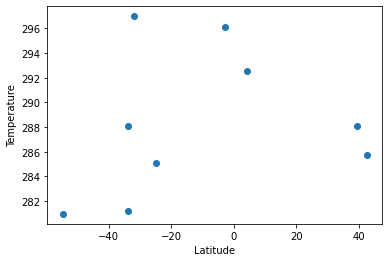

In [36]:
# Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('lat_vs_temp.png')
plt.show()

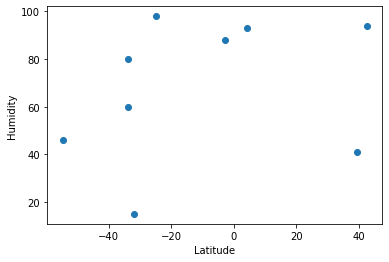

In [37]:
# Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_vs_humidity.png')
plt.show()

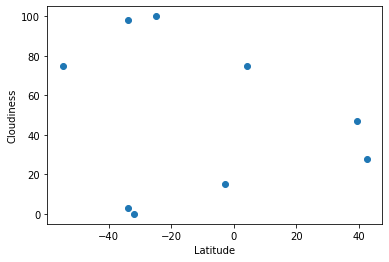

In [38]:
# Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

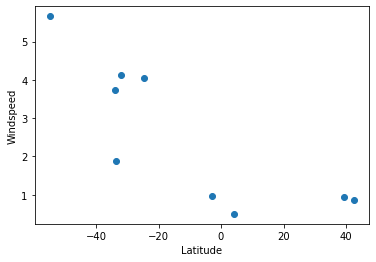

In [39]:
# Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [40]:
# Test whether city latitude is north (> 0) or south (< o)
# put in North or South bin and do regression

weather_data['Hemisphere'] = ['North' if x > 0 else 'South' for x in weather_data['Lat']]
# weather_data

south_cities = weather_data[weather_data['Hemisphere'] == 'South']
north_cities = weather_data[weather_data['Hemisphere'] == 'North']


The r-squared is: 0.9276240613998079


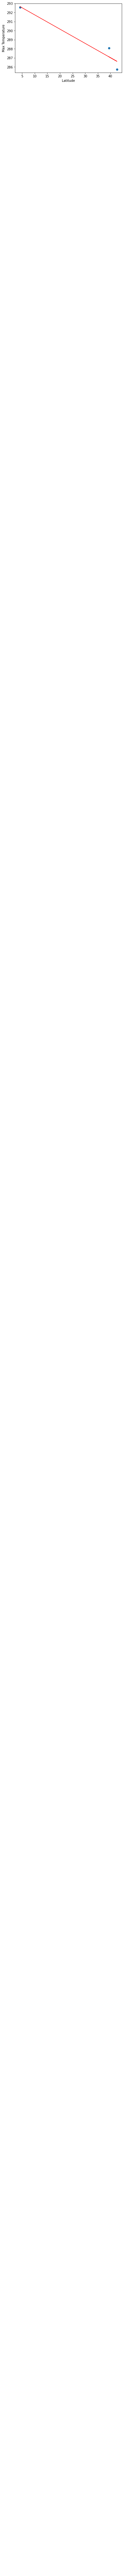

In [42]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression  *****EMPTY*****

x_values = north_cities['Lat']
y_values = north_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4226131162578995


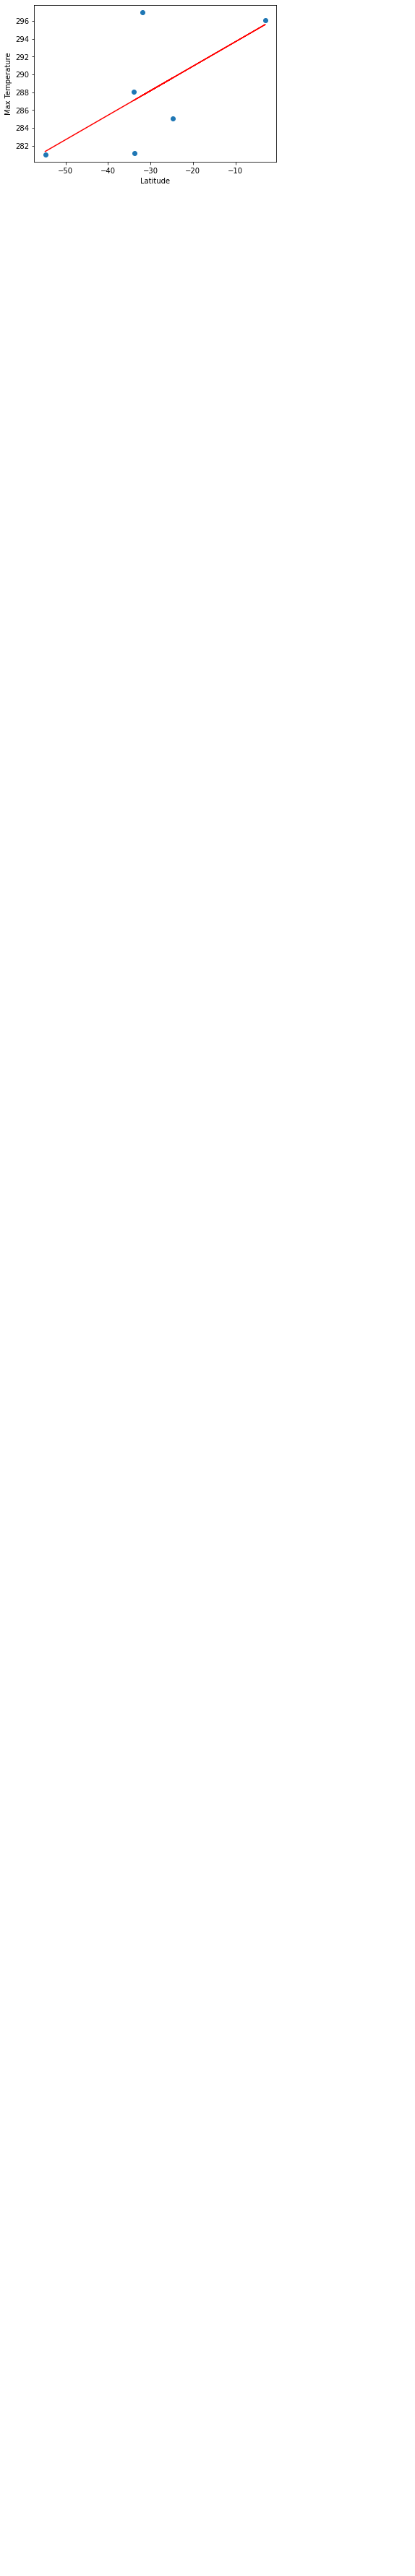

In [43]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1752158169336613


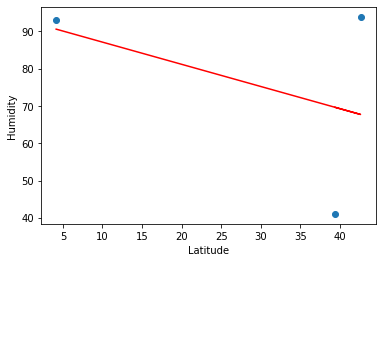

In [44]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression  *****EMPTY*****

x_values = north_cities['Lat']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2645180877931641


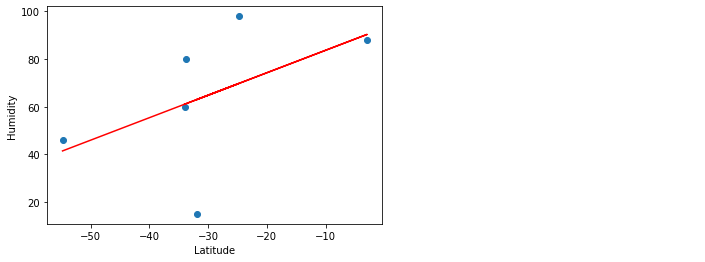

In [45]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.8898688236823794


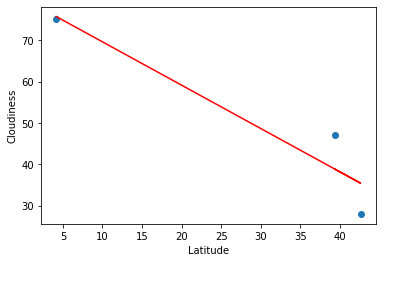

In [46]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.09482067069146478


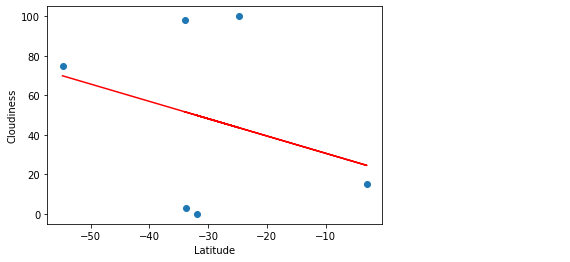

In [47]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.9422843757024039


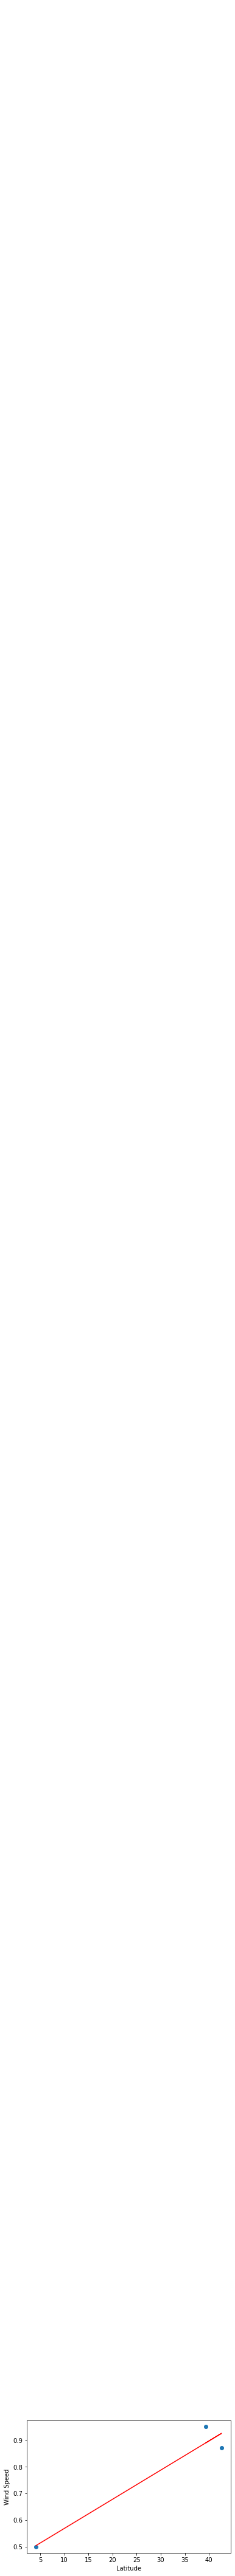

In [48]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.6584449725275889


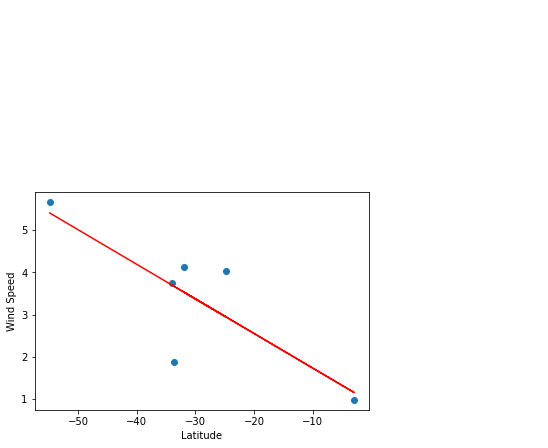

In [49]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()